In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
data=pd.read_csv('insurance_claims.csv')

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [4]:
data.drop('_c39',axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
data.info()

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(data)

print(missing_values)

Your selected dataframe has 39 columns.
There are 1 columns that have missing values.
                       Missing Values  % of Total Values
authorities_contacted              91                9.1


In [6]:
data.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [7]:
le = LabelEncoder()


for col in data:
    
    # print(col ,'   '  ,data[col].dtype)

    if data[col].dtype=='object':

        if len(data[col].unique()) <=2:
            print(col)
            le.fit(data[col])
            data[col]=le.transform(data[col])



# len(data['insured_sex'].unique())

insured_sex
fraud_reported


In [8]:
data['insured_sex'].head()

0    1
1    1
2    0
3    0
4    1
Name: insured_sex, dtype: int32

In [9]:
colum_name =[]
unique_value=[]
 
for col in data:
    if data[col].dtype == 'object':
         
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7


In [10]:
data.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [11]:
data.shape

(1000, 33)

<Axes: xlabel='insured_hobbies', ylabel='count'>

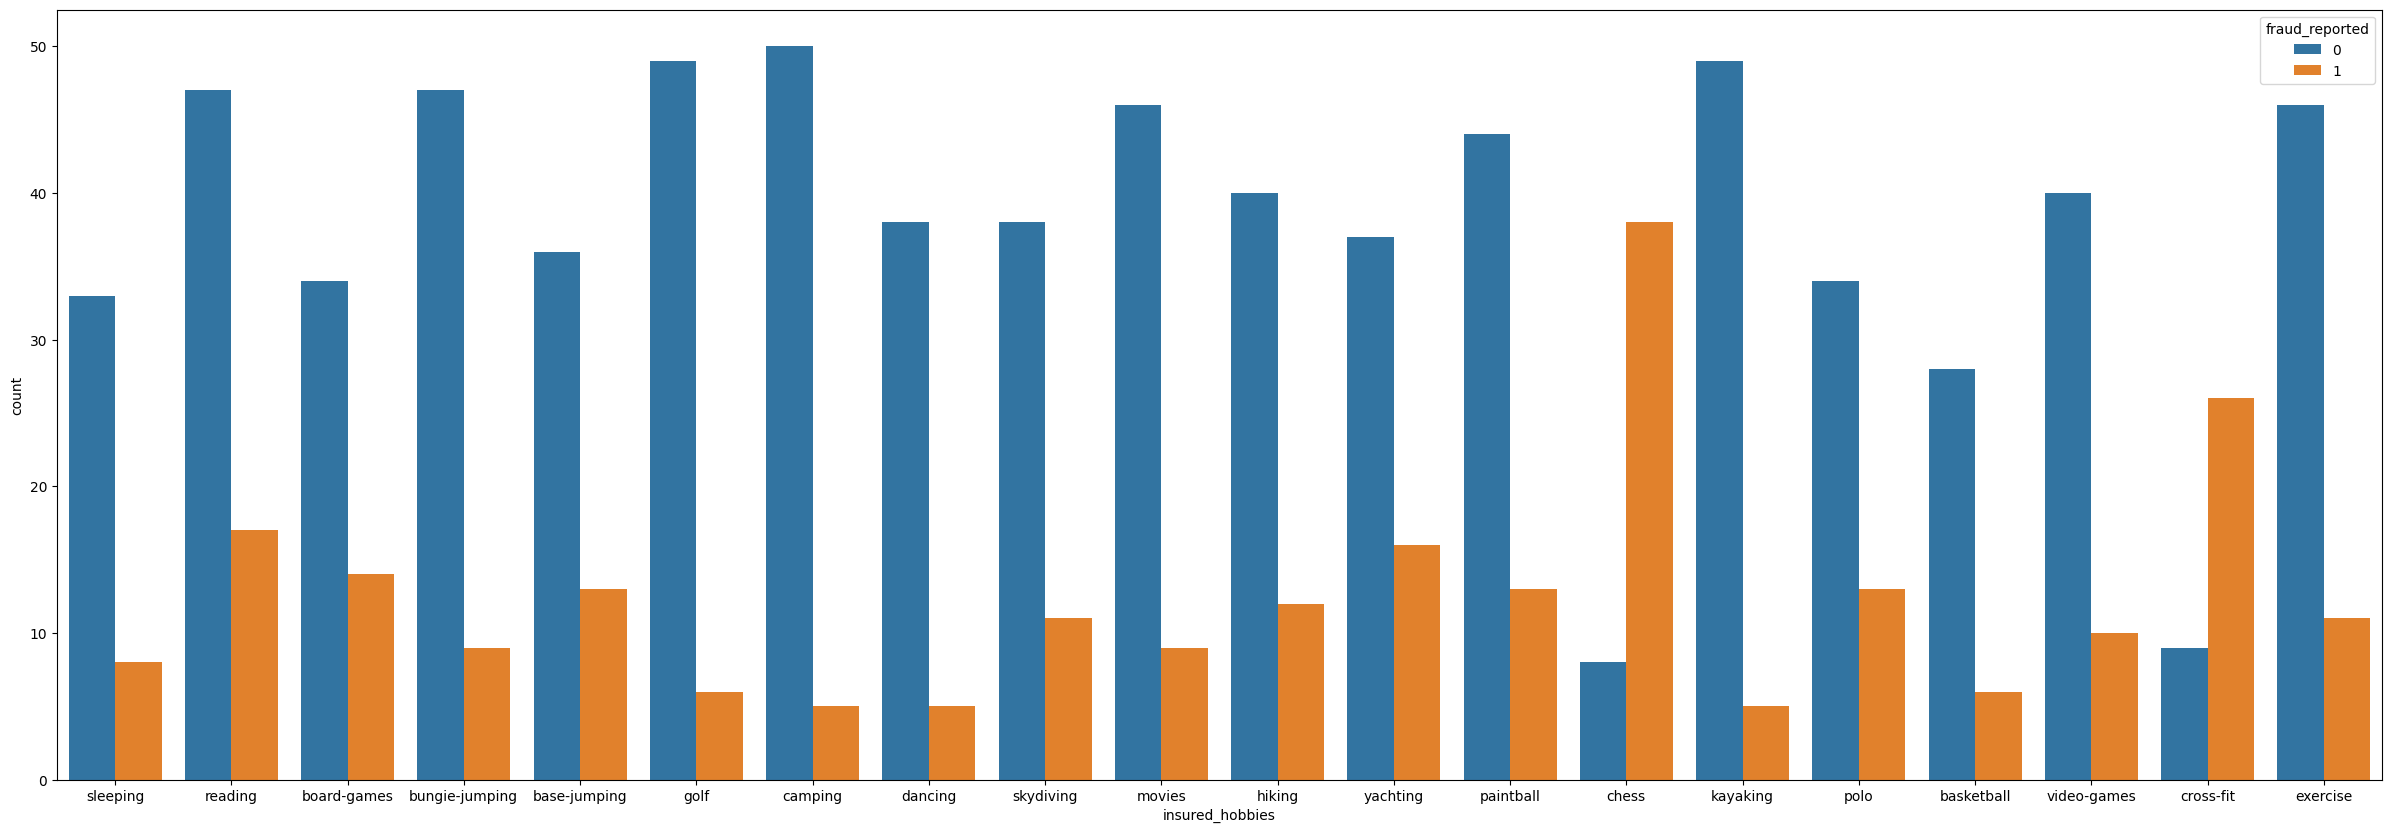

In [12]:
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)

In [13]:
data['insured_hobbies']=data['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

In [14]:
data['insured_hobbies']

0      Other
1      Other
2      Other
3      Other
4      Other
       ...  
995    Other
996    Other
997    Other
998    Other
999    Other
Name: insured_hobbies, Length: 1000, dtype: object

<Axes: xlabel='auto_make', ylabel='count'>

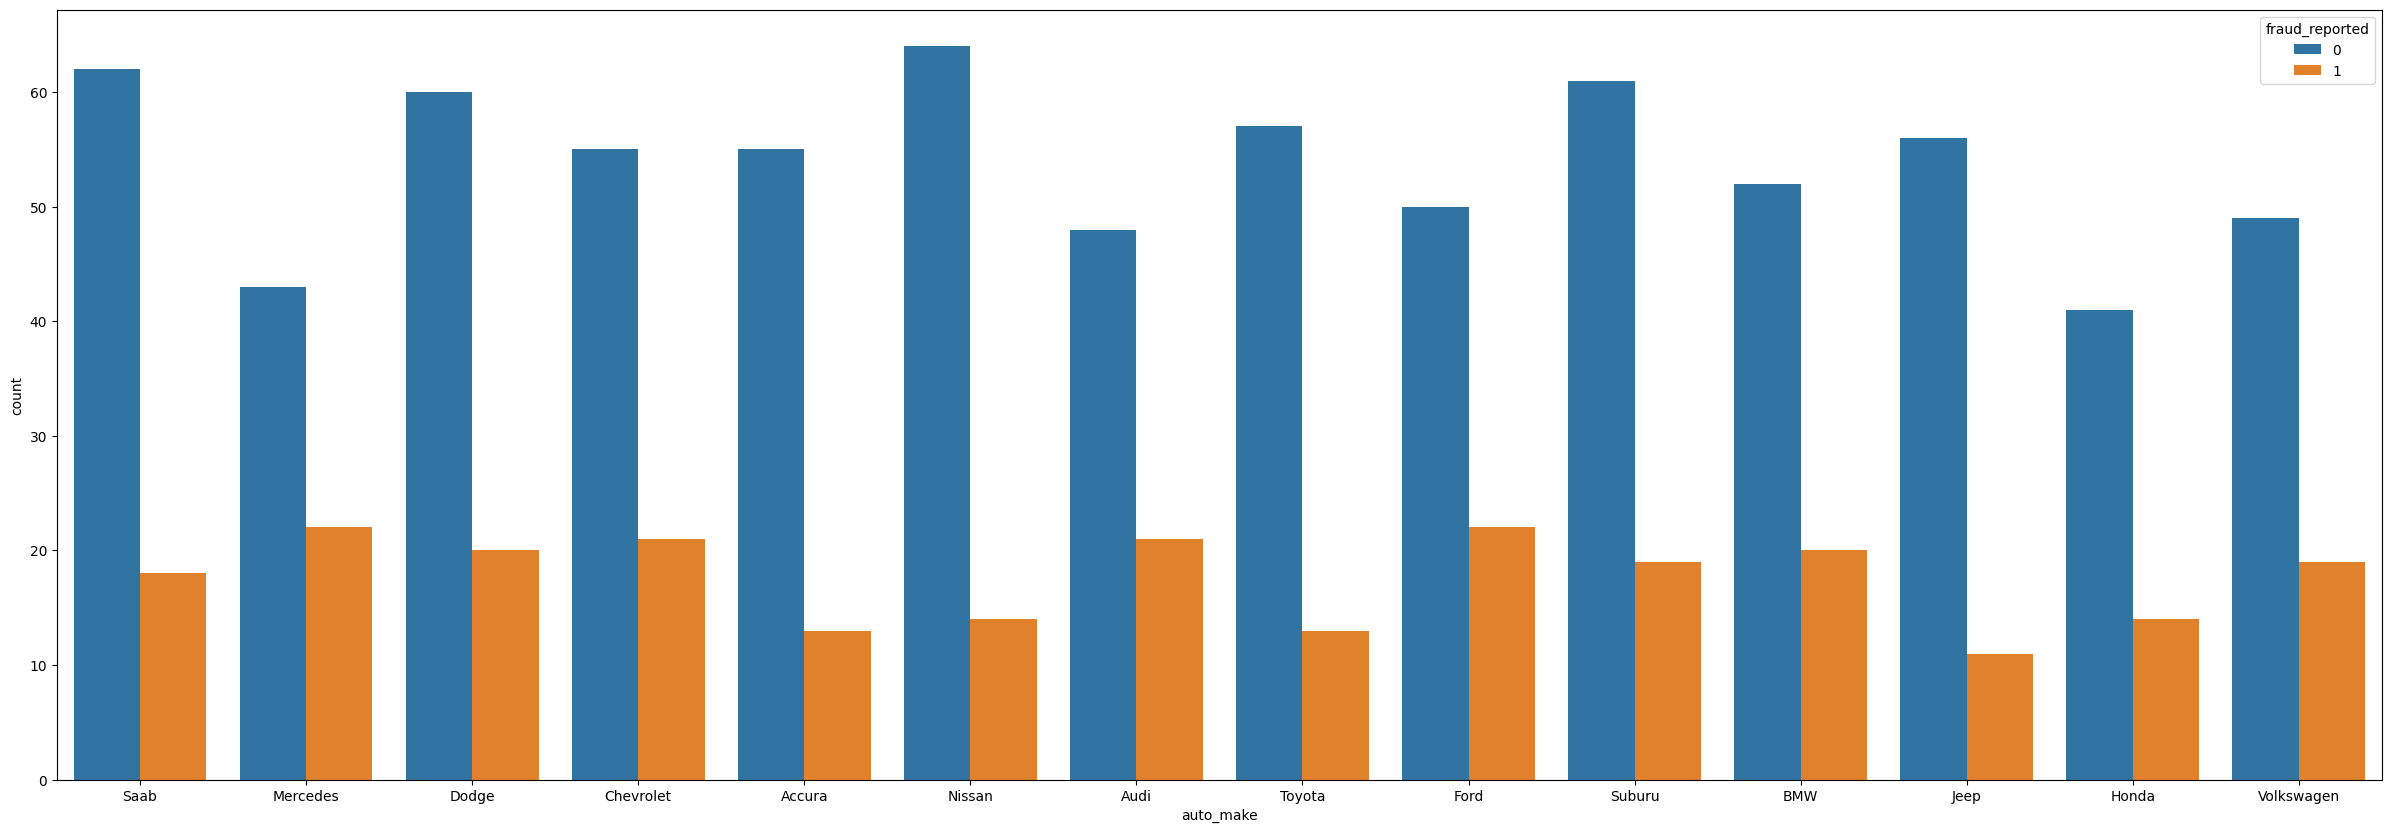

In [15]:
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x='auto_make',hue='fraud_reported',data=data)

In [ ]:
data.shape

In [16]:
colum_name =[]
unique_value=[]
 
for col in data:
    if data[col].dtype == 'object':
         
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
13,auto_make,14
2,insured_education_level,7
9,incident_state,7
10,incident_city,7
4,insured_relationship,6
5,incident_type,4
6,collision_type,4
7,incident_severity,4
8,authorities_contacted,4
0,policy_state,3


In [17]:
data = pd.get_dummies(data)

In [ ]:
data.shape

In [ ]:
data.head()

<Axes: xlabel='fraud_reported', ylabel='count'>

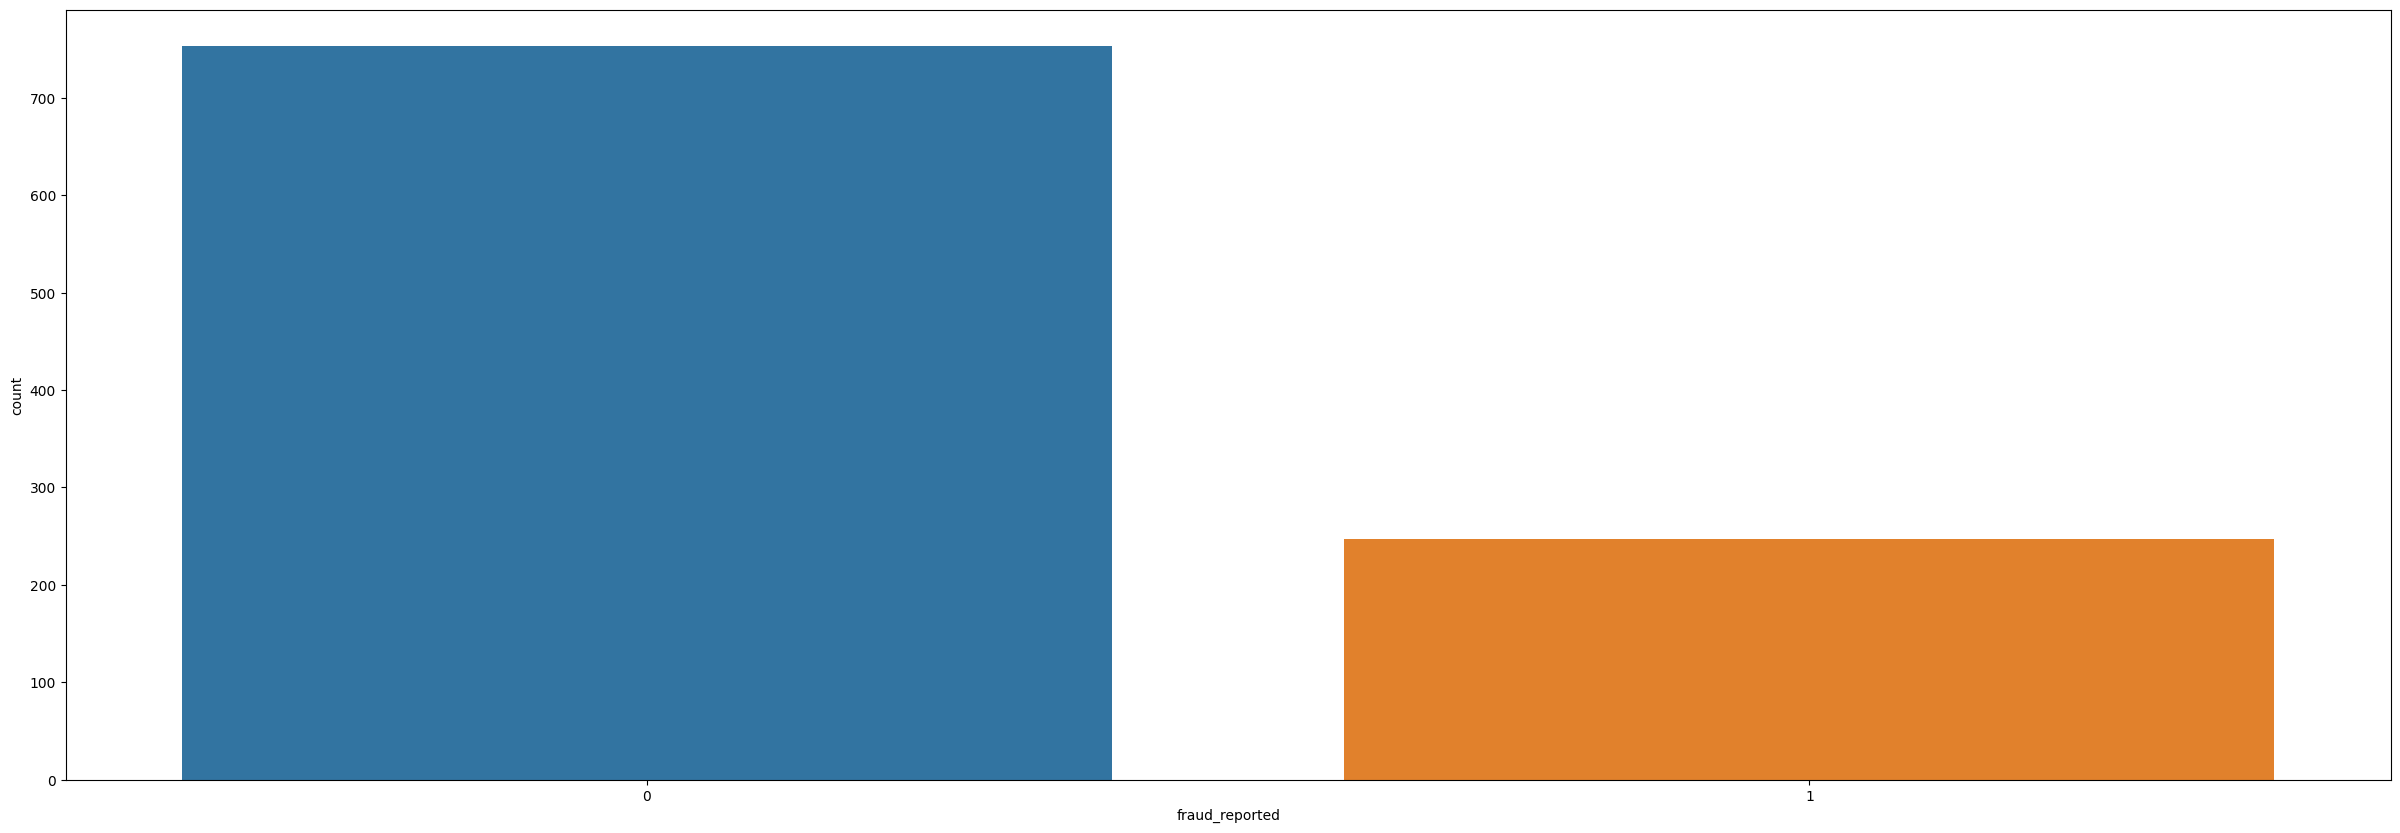

In [18]:
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x='fraud_reported',data=data)

In [19]:
X=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

In [23]:
X.shape

(1000, 90)

In [21]:
y.shape

(1000,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# 1. Random Forest
# 2. Logistic Regression
# 3. light GBM
# 4. Deep learning - model ANN 

Random Forest

In [24]:
model_rf= RandomForestClassifier(n_estimators=200,random_state=42)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [25]:
y_pred=model_rf.predict(X_test)

Report RF

In [26]:
report1=classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       230
           1       0.64      0.69      0.66        70

    accuracy                           0.84       300
   macro avg       0.77      0.78      0.78       300
weighted avg       0.84      0.84      0.84       300



In [27]:
report2=accuracy_score(y_test, y_pred)
print(report2)

0.8366666666666667


In [28]:
report3=confusion_matrix(y_test, y_pred)
print(report3)

[[203  27]
 [ 22  48]]


In [29]:
y_test.value_counts()

fraud_reported
0    230
1     70
Name: count, dtype: int64

In [30]:
y_test.head(50)

125    0
913    0
104    0
533    0
624    0
774    0
502    0
29     0
571    0
768    0
645    0
896    0
333    0
805    0
278    1
517    1
285    0
869    1
886    0
563    0
149    1
93     0
398    0
662    0
486    0
598    0
351    1
762    1
608    0
965    0
964    1
951    0
707    1
622    0
392    0
584    0
221    0
293    0
472    0
695    0
425    1
730    0
767    0
341    0
513    1
817    1
95     0
761    1
150    0
199    0
Name: fraud_reported, dtype: int32

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Logistic Regression

In [32]:
model_lr = LogisticRegression(random_state=42 , max_iter= 1000)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
y_pred=model_lr.predict(X_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
report1=classification_report(y_train, y_pred)
print(report1)

report3=confusion_matrix(y_train, y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       523
           1       0.40      0.01      0.02       177

    accuracy                           0.75       700
   macro avg       0.57      0.50      0.44       700
weighted avg       0.66      0.75      0.64       700

[[520   3]
 [175   2]]


In [ ]:
X.info()

In [35]:
X_lr=X[['months_as_customer','age','insured_sex','auto_year','insured_hobbies_Other','insured_hobbies_chess','insured_hobbies_cross-fit']]

In [36]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.3)

In [37]:
model_lr = LogisticRegression(random_state=42 , max_iter= 10000)
model_lr.fit(X_train_lr,y_train_lr)

LogisticRegression(max_iter=10000, random_state=42)

In [38]:
y_pred=model_lr.predict(X_test_lr)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [39]:
report1=classification_report(y_test_lr, y_pred)
print(report1)

report3=confusion_matrix(y_test_lr, y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       229
           1       0.80      0.34      0.48        71

    accuracy                           0.82       300
   macro avg       0.81      0.66      0.68       300
weighted avg       0.82      0.82      0.79       300

[[223   6]
 [ 47  24]]


Light GBM

In [40]:
import lightgbm as lgb

In [41]:
params= {
        "objective" : "binary",
       "n_estimators":1000,
       "reg_alpha" : 0.5,
       "reg_lambda":0.5,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":30,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 10,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 60,
       "max_bin":60,
       'max_depth':3,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':1.4,
        'bagging_fraction':0.8
    }

lgb_train= lgb.Dataset(X_train,label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test)

model_lgb= lgb.train(params,lgb_train, 1000 ,valid_sets=[lgb_train,lgb_test] )

c:\Program Files\Python310\lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [42]:
y_pred= model_lgb.predict(X_test , num_iteration=10000)
y_pred

array([0.28614165, 0.02847051, 0.03208835, 0.01423703, 0.03117844,
       0.09748475, 0.68123177, 0.02619377, 0.09009181, 0.05587622,
       0.14429674, 0.05513482, 0.03738448, 0.02613598, 0.70026997,
       0.61267445, 0.24343591, 0.4532188 , 0.03399596, 0.06641833,
       0.38316335, 0.83448672, 0.09137151, 0.05781558, 0.01979397,
       0.78943749, 0.25980764, 0.54259625, 0.07999814, 0.06610606,
       0.87425448, 0.02222813, 0.87177756, 0.03135599, 0.0690136 ,
       0.03714815, 0.0071461 , 0.05294609, 0.02162257, 0.04208596,
       0.78806752, 0.61474851, 0.768191  , 0.05912611, 0.73189544,
       0.87752762, 0.07671431, 0.90365449, 0.02123332, 0.04375522,
       0.05789266, 0.67016459, 0.09492483, 0.90292252, 0.02279753,
       0.12941495, 0.0601459 , 0.12034892, 0.06378472, 0.76505987,
       0.76067806, 0.85874387, 0.02446633, 0.06185722, 0.10884884,
       0.861479  , 0.127854  , 0.12627562, 0.83872351, 0.89078637,
       0.14137331, 0.74307252, 0.03638342, 0.03034036, 0.03609

In [43]:
y_pred= (model_lgb.predict(X_test, num_iteration=1000) > 0.5).astype('int32')
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [44]:
report1=classification_report(y_test, y_pred)
print(report1)

report3=confusion_matrix(y_test, y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       230
           1       0.62      0.80      0.70        70

    accuracy                           0.84       300
   macro avg       0.77      0.82      0.79       300
weighted avg       0.86      0.84      0.84       300

[[195  35]
 [ 14  56]]


Deep Learning

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [94]:


model_dl = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_lr.shape[1],)),  
    Dense(256, activation='relu'),  
    Dense(32, activation='relu'),   
    Dense(1, activation='sigmoid')  
])



c:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
#del model_dl

In [67]:
model_dl.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model_dl.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [84]:
X_train_lr=X_train_lr.astype('int32')
y_train_lr=y_train_lr.astype('int32')
X_test_lr=X_test_lr.astype('int32')
y_test_lr=y_test_lr.astype('int32')

In [109]:
scaler= StandardScaler()

X_lr= scaler.fit_transform(X_lr)

In [97]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.3)

In [92]:
X_train_lr

array([[ 0.94776783,  1.20975747,  1.41278352, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [ 0.13077155,  0.44353396, -0.22238259, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [-1.30331766, -0.43215006, -1.03996564, ..., -0.29488391,
        -0.27435163, -0.27011363],
       ...,
       [ 0.11338865,  0.00569195,  1.41278352, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [-0.55585298, -0.43215006, -0.22238259, ..., -0.29488391,
        -0.27435163, -0.27011363],
       [ 0.86085334,  0.77191546, -0.22238259, ..., -0.29488391,
         3.64495738, -0.27011363]])

In [98]:
model_dl.fit(X_train_lr,y_train_lr, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6364 - loss: 0.6324
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 0.5444 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7563 - loss: 0.5179 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7850 - loss: 0.4541 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7951 - loss: 0.4406 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8178 - loss: 0.3957 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.3661 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8687 - loss: 0.3163 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8535 - loss: 0.3193 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8663 - loss: 0.2852 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.2631 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [52]:
y_train_lr.shape

(700,)

In [107]:
y_pred= (model_dl.predict(X_test_lr) > 0.5).astype('int32')
# y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [108]:
report1=classification_report(y_test, y_pred)
print(report1)

report3=confusion_matrix(y_test, y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       230
           1       0.20      0.23      0.21        70

    accuracy                           0.61       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.63      0.61      0.62       300

[[166  64]
 [ 54  16]]
